**DATA INGESTION**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

print("✅ Google Drive mounted successfully!")




Mounted at /content/drive
✅ Google Drive mounted successfully!


In [ ]:
# IMPORT LIBRARIES

# Core Data Processing
import sqlite3
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")



✅ All libraries imported successfully!


In [ ]:
# DATABASE CONNECTION
DB_PATH = '/content/drive/MyDrive/Colab Notebooks/database.sqlite'

# Verify file exists before connecting
import os
if os.path.exists(DB_PATH):
    print(f"✅ Database file found at: {DB_PATH}")
    file_size = os.path.getsize(DB_PATH) / (1024**2)  # Convert to MB
    print(f"📂 File size: {file_size:.2f} MB")
else:
    print(f"❌ Database file NOT found at: {DB_PATH}")
    print("Please verify the path!")

# Establish connection
try:
    conn = sqlite3.connect(DB_PATH)
    print("✅ Successfully connected to database")
    print("="*70)
except Exception as e:
    print(f"❌ Connection failed: {e}")


✅ Database file found at: /content/drive/MyDrive/Colab Notebooks/database.sqlite
📂 File size: 298.59 MB
✅ Successfully connected to database


In [ ]:
# DATABASE EXPLORATION

# List all tables
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
available_tables = pd.read_sql(tables_query, conn)

print("📋 AVAILABLE TABLES IN DATABASE:")
print("="*70)
for idx, table in enumerate(available_tables['name'], 1):
    print(f"{idx}. {table}")
print("="*70)


📋 AVAILABLE TABLES IN DATABASE:
1. sqlite_sequence
2. Player_Attributes
3. Player
4. Match
5. League
6. Country
7. Team
8. Team_Attributes


In [ ]:
# TABLE SCHEMA INSPECTION
print("\n🔍 PLAYER TABLE STRUCTURE:")
print("="*70)
player_schema = pd.read_sql("PRAGMA table_info(Player);", conn)
display(player_schema[['name', 'type']])

print("\n🔍 PLAYER_ATTRIBUTES TABLE STRUCTURE:")
print("="*70)
attributes_schema = pd.read_sql("PRAGMA table_info(Player_Attributes);", conn)
display(attributes_schema[['name', 'type']])
print("="*70)



🔍 PLAYER TABLE STRUCTURE:


,name,type
0,id,INTEGER
1,player_api_id,INTEGER
2,player_name,TEXT
3,player_fifa_api_id,INTEGER
4,birthday,TEXT
5,height,INTEGER
6,weight,INTEGER



🔍 PLAYER_ATTRIBUTES TABLE STRUCTURE:


,name,type
0,id,INTEGER
1,player_fifa_api_id,INTEGER
2,player_api_id,INTEGER
3,date,TEXT
4,overall_rating,INTEGER
5,potential,INTEGER
6,preferred_foot,TEXT
7,attacking_work_rate,TEXT
8,defensive_work_rate,TEXT
9,crossing,INTEGER


In [ ]:
# DATA LOADING
print("🔄 Loading data from database...")
print("="*70)

# SQL Query to join Player and Player_Attributes
query = """
SELECT
    -- Identifiers
    p.player_api_id,
    p.player_fifa_api_id,
    p.player_name,
    pa.date,

    -- Overall Metrics
    pa.overall_rating,
    pa.potential,

    -- Player Characteristics
    pa.preferred_foot,
    pa.attacking_work_rate,
    pa.defensive_work_rate,

    -- Technical Skills
    pa.crossing,
    pa.finishing,
    pa.heading_accuracy,
    pa.short_passing,
    pa.volleys,
    pa.dribbling,
    pa.curve,
    pa.free_kick_accuracy,
    pa.long_passing,
    pa.ball_control,

    -- Physical Attributes
    pa.acceleration,
    pa.sprint_speed,
    pa.agility,
    pa.reactions,
    pa.balance,
    pa.shot_power,
    pa.jumping,
    pa.stamina,
    pa.strength,

    -- Attacking
    pa.long_shots,
    pa.positioning,
    pa.vision,
    pa.penalties,

    -- Defensive
    pa.aggression,
    pa.interceptions,
    pa.marking,
    pa.standing_tackle,
    pa.sliding_tackle,

    -- Goalkeeper
    pa.gk_diving,
    pa.gk_handling,
    pa.gk_kicking,
    pa.gk_positioning,
    pa.gk_reflexes

FROM Player p
INNER JOIN Player_Attributes pa
    ON p.player_api_id = pa.player_api_id
WHERE pa.overall_rating IS NOT NULL
ORDER BY p.player_name, pa.date DESC
"""

# Load data into DataFrame
df = pd.read_sql(query, conn)

print("✅ Data loaded successfully!")
print(f"📊 Total Records: {df.shape[0]:,}")
print(f"📊 Total Columns: {df.shape[1]}")
print(f"👥 Unique Players: {df['player_name'].nunique():,}")
print(f"📅 Date Range: {df['date'].min()} → {df['date'].max()}")
print("="*70)


🔄 Loading data from database...
✅ Data loaded successfully!
📊 Total Records: 183,142
📊 Total Columns: 42
👥 Unique Players: 10,848
📅 Date Range: 2007-02-22 00:00:00 → 2016-07-07 00:00:00


In [ ]:
# INITIAL DATA INSPECTION
print("\n📋 FIRST 5 ROWS OF DATASET:")
print("="*70)
display(df.head())





📋 FIRST 5 ROWS OF DATASET:


,player_api_id,player_fifa_api_id,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,positioning,vision,penalties,aggression,interceptions,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,218353,Aaron Appindangoye,2016-02-18 00:00:00,67,71,right,medium,medium,49,44,71,61,44.0,51,45.0,39,64,49,60,64,59.0,47,65.0,55,58.0,54,76,35,45,54.0,48,71,70,65,69,69.0,6,11,10,8,8
1,505942,218353,Aaron Appindangoye,2015-11-19 00:00:00,67,71,right,medium,medium,49,44,71,61,44.0,51,45.0,39,64,49,60,64,59.0,47,65.0,55,58.0,54,76,35,45,54.0,48,71,70,65,69,69.0,6,11,10,8,8
2,505942,218353,Aaron Appindangoye,2015-09-21 00:00:00,62,66,right,medium,medium,49,44,71,61,44.0,51,45.0,39,64,49,60,64,59.0,47,65.0,55,58.0,54,76,35,45,54.0,48,63,41,65,66,69.0,6,11,10,8,8
3,505942,218353,Aaron Appindangoye,2015-03-20 00:00:00,61,65,right,medium,medium,48,43,70,60,43.0,50,44.0,38,63,48,60,64,59.0,46,65.0,54,58.0,54,76,34,44,53.0,47,62,40,62,63,66.0,5,10,9,7,7
4,505942,218353,Aaron Appindangoye,2007-02-22 00:00:00,61,65,right,medium,medium,48,43,70,60,43.0,50,44.0,38,63,48,60,64,59.0,46,65.0,54,58.0,54,76,34,44,53.0,47,62,40,62,63,66.0,5,10,9,7,7


In [ ]:
print("\n📋 DATASET INFO:")
print("="*70)
df.info()


📋 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183142 entries, 0 to 183141
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183142 non-null  int64  
 1   player_fifa_api_id   183142 non-null  int64  
 2   player_name          183142 non-null  object 
 3   date                 183142 non-null  object 
 4   overall_rating       183142 non-null  int64  
 5   potential            183142 non-null  int64  
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  int64  
 10  finishing            183142 non-null  int64  
 11  heading_accuracy     183142 non-null  int64  
 12  short_passing        183142 non-null  int64  
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  int64  
 15  

In [ ]:
# STEP 3: UNDERSTAND FEATURES
print("\nSTEP 3: UNDERSTANDING FEATURES")
print("="*70)

# Get descriptive statistics (only numeric columns, exclude IDs)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['player_api_id', 'player_fifa_api_id']
skill_cols = [col for col in numeric_cols if col not in exclude_cols]

print("\nDESCRIPTIVE STATISTICS (Numeric Features):")
display(df[skill_cols].describe().T)

# Show unique values for categorical columns
print("\nCategorical Features:")
categorical_cols = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())



STEP 3: UNDERSTANDING FEATURES

DESCRIPTIVE STATISTICS (Numeric Features):


,count,mean,std,min,25%,50%,75%,max
overall_rating,183142.0,68.600015,7.041139,33.0,64.0,69.0,73.0,94.0
potential,183142.0,73.460353,6.592271,39.0,69.0,74.0,78.0,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.0,59.0,68.0,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.0,53.0,65.0,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.0,60.0,68.0,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.0,65.0,72.0,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.0,52.0,64.0,93.0
dribbling,183142.0,59.175154,17.744688,1.0,52.0,64.0,72.0,97.0
curve,181265.0,52.965675,18.255788,2.0,41.0,56.0,67.0,94.0
free_kick_accuracy,183142.0,49.380950,17.831746,1.0,36.0,50.0,63.0,97.0



Categorical Features:

preferred_foot: 2 unique values
preferred_foot
right    138409
left      44733
Name: count, dtype: int64

attacking_work_rate: 8 unique values
attacking_work_rate
medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: count, dtype: int64

defensive_work_rate: 19 unique values
defensive_work_rate
medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: count, dtype: int64



🔍 MISSING VALUES ANALYSIS:


,Column,Missing_Count,Missing_Percentage
7,attacking_work_rate,2394,1.31
13,volleys,1877,1.02
15,curve,1877,1.02
21,agility,1877,1.02
23,balance,1877,1.02
25,jumping,1877,1.02
30,vision,1877,1.02
36,sliding_tackle,1877,1.02


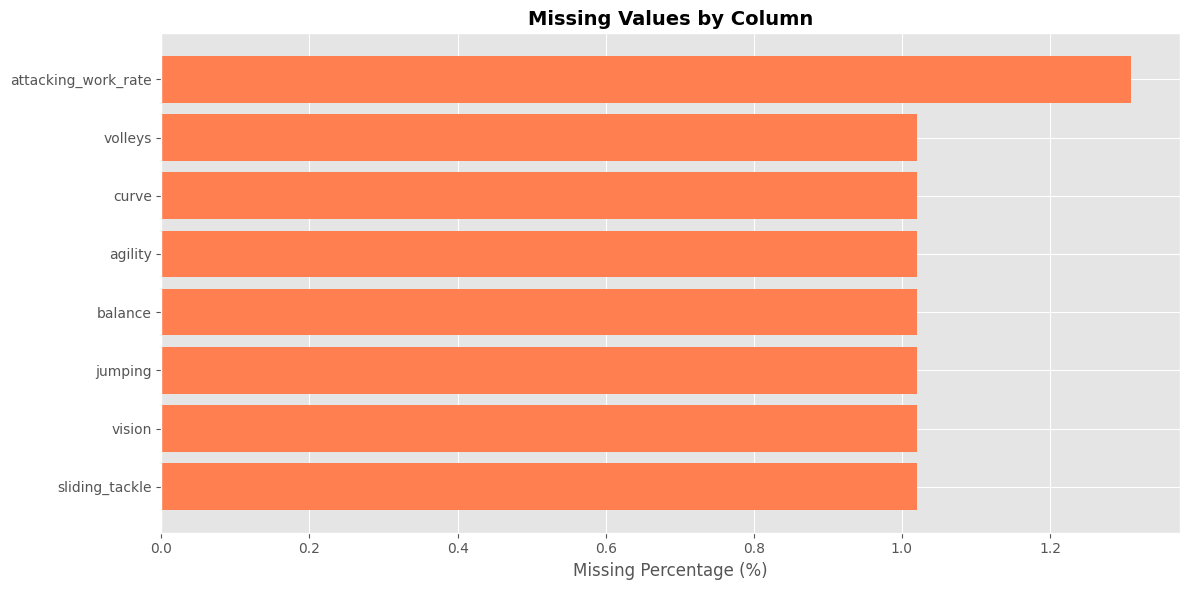

In [ ]:
# MISSING VALUES ANALYSIS
print("\n🔍 MISSING VALUES ANALYSIS:")
print("="*70)

# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})

# Filter columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Count', ascending=False
)

if len(missing_data) > 0:
    display(missing_data)

    # Visualize
    plt.figure(figsize=(12, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found!")

print("="*70)


In [ ]:
# DUPLICATE RECORDS CHECK

print("\n DUPLICATE RECORDS ANALYSIS:")
print("="*70)

total_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates:,}")

# Check duplicates per player (multiple attribute snapshots)
records_per_player = df.groupby('player_name').size()
print(f" Average records per player: {records_per_player.mean():.2f}")
print(f" Max records for a player: {records_per_player.max()}")
print(f" Players with multiple records: {(records_per_player > 1).sum():,}")

print("="*70)



 DUPLICATE RECORDS ANALYSIS:
Total duplicate rows: 0
 Average records per player: 16.88
 Max records for a player: 107
 Players with multiple records: 10,848


**2**

In [ ]:
# getting few rows fo the dataframe
df.head()

,player_api_id,player_fifa_api_id,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,positioning,vision,penalties,aggression,interceptions,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,218353,Aaron Appindangoye,2016-02-18 00:00:00,67,71,right,medium,medium,49,44,71,61,44.0,51,45.0,39,64,49,60,64,59.0,47,65.0,55,58.0,54,76,35,45,54.0,48,71,70,65,69,69.0,6,11,10,8,8
1,505942,218353,Aaron Appindangoye,2015-11-19 00:00:00,67,71,right,medium,medium,49,44,71,61,44.0,51,45.0,39,64,49,60,64,59.0,47,65.0,55,58.0,54,76,35,45,54.0,48,71,70,65,69,69.0,6,11,10,8,8
2,505942,218353,Aaron Appindangoye,2015-09-21 00:00:00,62,66,right,medium,medium,49,44,71,61,44.0,51,45.0,39,64,49,60,64,59.0,47,65.0,55,58.0,54,76,35,45,54.0,48,63,41,65,66,69.0,6,11,10,8,8
3,505942,218353,Aaron Appindangoye,2015-03-20 00:00:00,61,65,right,medium,medium,48,43,70,60,43.0,50,44.0,38,63,48,60,64,59.0,46,65.0,54,58.0,54,76,34,44,53.0,47,62,40,62,63,66.0,5,10,9,7,7
4,505942,218353,Aaron Appindangoye,2007-02-22 00:00:00,61,65,right,medium,medium,48,43,70,60,43.0,50,44.0,38,63,48,60,64,59.0,46,65.0,54,58.0,54,76,34,44,53.0,47,62,40,62,63,66.0,5,10,9,7,7


In [ ]:
# Features of the dataset
print(df.columns)
print("The total columns are:",len(df.columns) )

Index(['player_api_id', 'player_fifa_api_id', 'player_name', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'positioning', 'vision', 'penalties',
       'aggression', 'interceptions', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes'],
      dtype='object')
The total columns are: 42


In [ ]:

print("\n📊 Descriptive Statistics (Numeric Features):")
display(df[skill_cols].describe().T)

# Show unique values for categorical columns
print("\n📊 Categorical Features:")
categorical_cols = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())



📊 Descriptive Statistics (Numeric Features):


,count,mean,std,min,25%,50%,75%,max
overall_rating,183142.0,68.600015,7.041139,33.0,64.0,69.0,73.0,94.0
potential,183142.0,73.460353,6.592271,39.0,69.0,74.0,78.0,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.0,59.0,68.0,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.0,53.0,65.0,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.0,60.0,68.0,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.0,65.0,72.0,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.0,52.0,64.0,93.0
dribbling,183142.0,59.175154,17.744688,1.0,52.0,64.0,72.0,97.0
curve,181265.0,52.965675,18.255788,2.0,41.0,56.0,67.0,94.0
free_kick_accuracy,183142.0,49.380950,17.831746,1.0,36.0,50.0,63.0,97.0



📊 Categorical Features:

preferred_foot: 2 unique values
preferred_foot
right    138409
left      44733
Name: count, dtype: int64

attacking_work_rate: 8 unique values
attacking_work_rate
medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: count, dtype: int64

defensive_work_rate: 19 unique values
defensive_work_rate
medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: count, dtype: int64


DATA DICTIONARY

In [ ]:

# STEP 5: GENERATE DATA DICTIONARY TABLE

print("\nSTEP 5: GENERATING DATA DICTIONARY")
print("="*70)

# Define data dictionary
data_dict = []

# 1. Identifier columns
data_dict.append({'feature': 'player_api_id', 'type': 'Quantitative, Nominal', 'description': 'Unique player identifier for database joins', 'relevance': 'Low - Identifier only (drop before modeling)'})
data_dict.append({'feature': 'player_fifa_api_id', 'type': 'Quantitative, Nominal', 'description': 'FIFA game database identifier', 'relevance': 'Low - Identifier only (drop before modeling)'})
data_dict.append({'feature': 'player_name', 'type': 'Qualitative, Nominal', 'description': 'Player full name', 'relevance': 'Low - For reporting only (drop before modeling)'})
data_dict.append({'feature': 'date', 'type': 'Qualitative, Ordinal', 'description': 'Timestamp of attribute snapshot', 'relevance': 'Medium - For temporal filtering (drop before modeling)'})

# 2. Overall metrics
data_dict.append({'feature': 'overall_rating', 'type': 'Quantitative, Discrete (1-99)', 'description': 'FIFA overall player rating', 'relevance': 'High - Global skill indicator'})
data_dict.append({'feature': 'potential', 'type': 'Quantitative, Discrete (1-99)', 'description': 'FIFA potential rating (future skill ceiling)', 'relevance': 'Medium - Career development indicator'})

# 3. Player characteristics
data_dict.append({'feature': 'preferred_foot', 'type': 'Qualitative, Nominal (Categorical)', 'description': 'Dominant foot (Left/Right)', 'relevance': 'Medium - Position tendency (encode before modeling)'})
data_dict.append({'feature': 'attacking_work_rate', 'type': 'Qualitative, Ordinal (Categorical)', 'description': 'Attacking effort level (Low/Medium/High)', 'relevance': 'High - Role tendency indicator'})
data_dict.append({'feature': 'defensive_work_rate', 'type': 'Qualitative, Ordinal (Categorical)', 'description': 'Defensive effort level (Low/Medium/High)', 'relevance': 'High - Role tendency indicator'})

# 4. Technical skills
technical = [
    ('crossing', 'Quality of wide deliveries and crosses'),
    ('finishing', 'Goal-scoring ability in/around box'),
    ('heading_accuracy', 'Accuracy when heading the ball'),
    ('short_passing', 'Short passing quality'),
    ('volleys', 'Technique on volleyed shots'),
    ('dribbling', '1v1 ball-carrying skill'),
    ('curve', 'Ability to bend shots/passes'),
    ('free_kick_accuracy', 'Direct free-kick precision'),
    ('long_passing', 'Long pass range and accuracy'),
    ('ball_control', 'First touch and control')
]
for skill, desc in technical:
    data_dict.append({'feature': skill, 'type': 'Quantitative, Discrete (1-99)', 'description': desc, 'relevance': 'High - Technical role differentiation'})

# 5. Physical attributes
physical = [
    ('acceleration', 'Quickness off the mark'),
    ('sprint_speed', 'Top speed over distance'),
    ('agility', 'Mobility and nimbleness'),
    ('reactions', 'Response speed to events'),
    ('balance', 'Stability on the ball'),
    ('shot_power', 'Power behind shots'),
    ('jumping', 'Vertical leap'),
    ('stamina', 'Endurance'),
    ('strength', 'Physical power in duels')
]
for attr, desc in physical:
    data_dict.append({'feature': attr, 'type': 'Quantitative, Discrete (1-99)', 'description': desc, 'relevance': 'High - Physical role requirements'})

# 6. Attacking
attacking = [
    ('long_shots', 'Shooting from distance'),
    ('positioning', 'Attacking off-ball sense'),
    ('vision', 'Creative passing vision'),
    ('penalties', 'Penalty taking skill')
]
for skill, desc in attacking:
    data_dict.append({'feature': skill, 'type': 'Quantitative, Discrete (1-99)', 'description': desc, 'relevance': 'High - Attacking role identification'})

# 7. Defensive
defensive = [
    ('aggression', 'Willingness to engage in duels'),
    ('interceptions', 'Reading and cutting passes'),
    ('marking', 'Tracking opponents'),
    ('standing_tackle', 'Standing tackle ability'),
    ('sliding_tackle', 'Sliding tackle ability')
]
for skill, desc in defensive:
    data_dict.append({'feature': skill, 'type': 'Quantitative, Discrete (1-99)', 'description': desc, 'relevance': 'High - Defensive role identification'})

# 8. Goalkeeper
goalkeeper = [
    ('gk_diving', 'GK diving saves'),
    ('gk_handling', 'GK ball handling'),
    ('gk_kicking', 'GK distribution/kicking'),
    ('gk_positioning', 'GK positioning'),
    ('gk_reflexes', 'GK reflex saves')
]
for skill, desc in goalkeeper:
    data_dict.append({'feature': skill, 'type': 'Quantitative, Discrete (1-99)', 'description': desc, 'relevance': 'High - Goalkeeper role essential'})

# Create DataFrame
data_dictionary = pd.DataFrame(data_dict)
data_dictionary.columns = ['Name of Feature', 'Type', 'Description', 'Relevance']

print("\n📋 DATA DICTIONARY TABLE:")
display(data_dictionary)

# Save to CSV
output_path = '/content/drive/MyDrive/Colab Notebooks/soccer_data_dictionary.csv'
data_dictionary.to_csv(output_path, index=False)
print(f"\n✅ Data dictionary saved to: {output_path}")


STEP 5: GENERATING DATA DICTIONARY

📋 DATA DICTIONARY TABLE:


,Name of Feature,Type,Description,Relevance
0,player_api_id,"Quantitative, Nominal",Unique player identifier for database joins,Low - Identifier only (drop before modeling)
1,player_fifa_api_id,"Quantitative, Nominal",FIFA game database identifier,Low - Identifier only (drop before modeling)
2,player_name,"Qualitative, Nominal",Player full name,Low - For reporting only (drop before modeling)
3,date,"Qualitative, Ordinal",Timestamp of attribute snapshot,Medium - For temporal filtering (drop before m...
4,overall_rating,"Quantitative, Discrete (1-99)",FIFA overall player rating,High - Global skill indicator
5,potential,"Quantitative, Discrete (1-99)",FIFA potential rating (future skill ceiling),Medium - Career development indicator
6,preferred_foot,"Qualitative, Nominal (Categorical)",Dominant foot (Left/Right),Medium - Position tendency (encode before mode...
7,attacking_work_rate,"Qualitative, Ordinal (Categorical)",Attacking effort level (Low/Medium/High),High - Role tendency indicator
8,defensive_work_rate,"Qualitative, Ordinal (Categorical)",Defensive effort level (Low/Medium/High),High - Role tendency indicator
9,crossing,"Quantitative, Discrete (1-99)",Quality of wide deliveries and crosses,High - Technical role differentiation



✅ Data dictionary saved to: /content/drive/MyDrive/Colab Notebooks/soccer_data_dictionary.csv


In [ ]:
# ANALYZE REQUIRED FEATURES & RELEVANCE
print("\n🔍 ANALYZING REQUIRED FEATURES")
print("="*70)

# Step 1: Get all column names from dataframe
required_features = list(df.columns)

print(f"✅ Total features in dataset: {len(required_features)}")
print(f"\nFeatures: {required_features}")

# Step 2: Count relevance levels from data dictionary
print("\n📊 RELEVANCE BREAKDOWN:")
print(data_dictionary.Relevance.value_counts())
print(f"\nTotal features documented: {len(data_dictionary.Relevance)}")

# Step 3: Identify LOW relevance features to drop
print("\n🗑️ LOW RELEVANCE COLUMNS (to drop):")
low_relevance = data_dictionary[data_dictionary['Relevance'].str.contains('Low', case=False, na=False)]
print(low_relevance[['Name of Feature', 'Relevance']])

# Step 4: Drop low relevance columns from dataframe
low_relevance_cols = low_relevance['Name of Feature'].tolist()
df_filtered = df.drop(columns=[col for col in low_relevance_cols if col in df.columns])

print(f"\n✅ Shape after dropping low relevance features:")
print(f"   Before: {df.shape}")
print(f"   After:  {df_filtered.shape}")
print(f"   Dropped: {df.shape[1] - df_filtered.shape[1]} columns")

# Step 5: Show remaining features for modeling
print(f"\n✅ Features retained for modeling: {df_filtered.shape[1]} columns")
print(f"   These will be used for training the classification model")



🔍 ANALYZING REQUIRED FEATURES
✅ Total features in dataset: 42

Features: ['player_api_id', 'player_fifa_api_id', 'player_name', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'positioning', 'vision', 'penalties', 'aggression', 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

📊 RELEVANCE BREAKDOWN:
Relevance
High - Technical role differentiation                     10
High - Physical role requirements                          9
High - Goalkeeper role essential                           5
High - Defensive role identification                       5
High - Attacking rol


📊 VISUALIZING RELEVANCE DISTRIBUTION


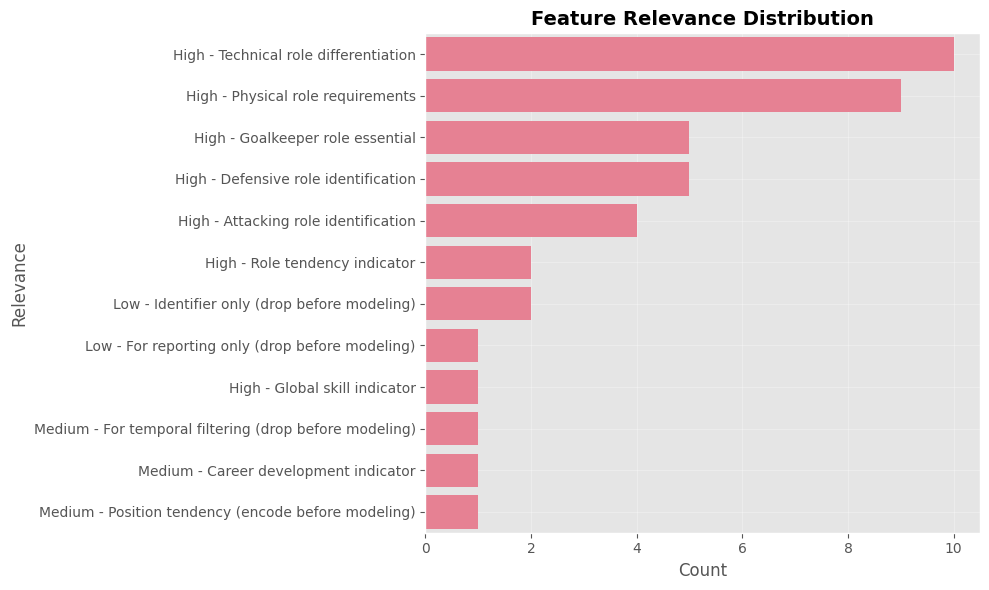

✅ Visualization complete!


In [ ]:
# VISUALIZE RELEVANCE DISTRIBUTION

import seaborn as sns
import matplotlib.pyplot as plt

print("\n📊 VISUALIZING RELEVANCE DISTRIBUTION")
print("="*70)

# Create countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_dictionary, y='Relevance', order=data_dictionary['Relevance'].value_counts().index)
plt.title('Feature Relevance Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Relevance', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Visualization complete!")



🔗 FEATURE CORRELATION ANALYSIS


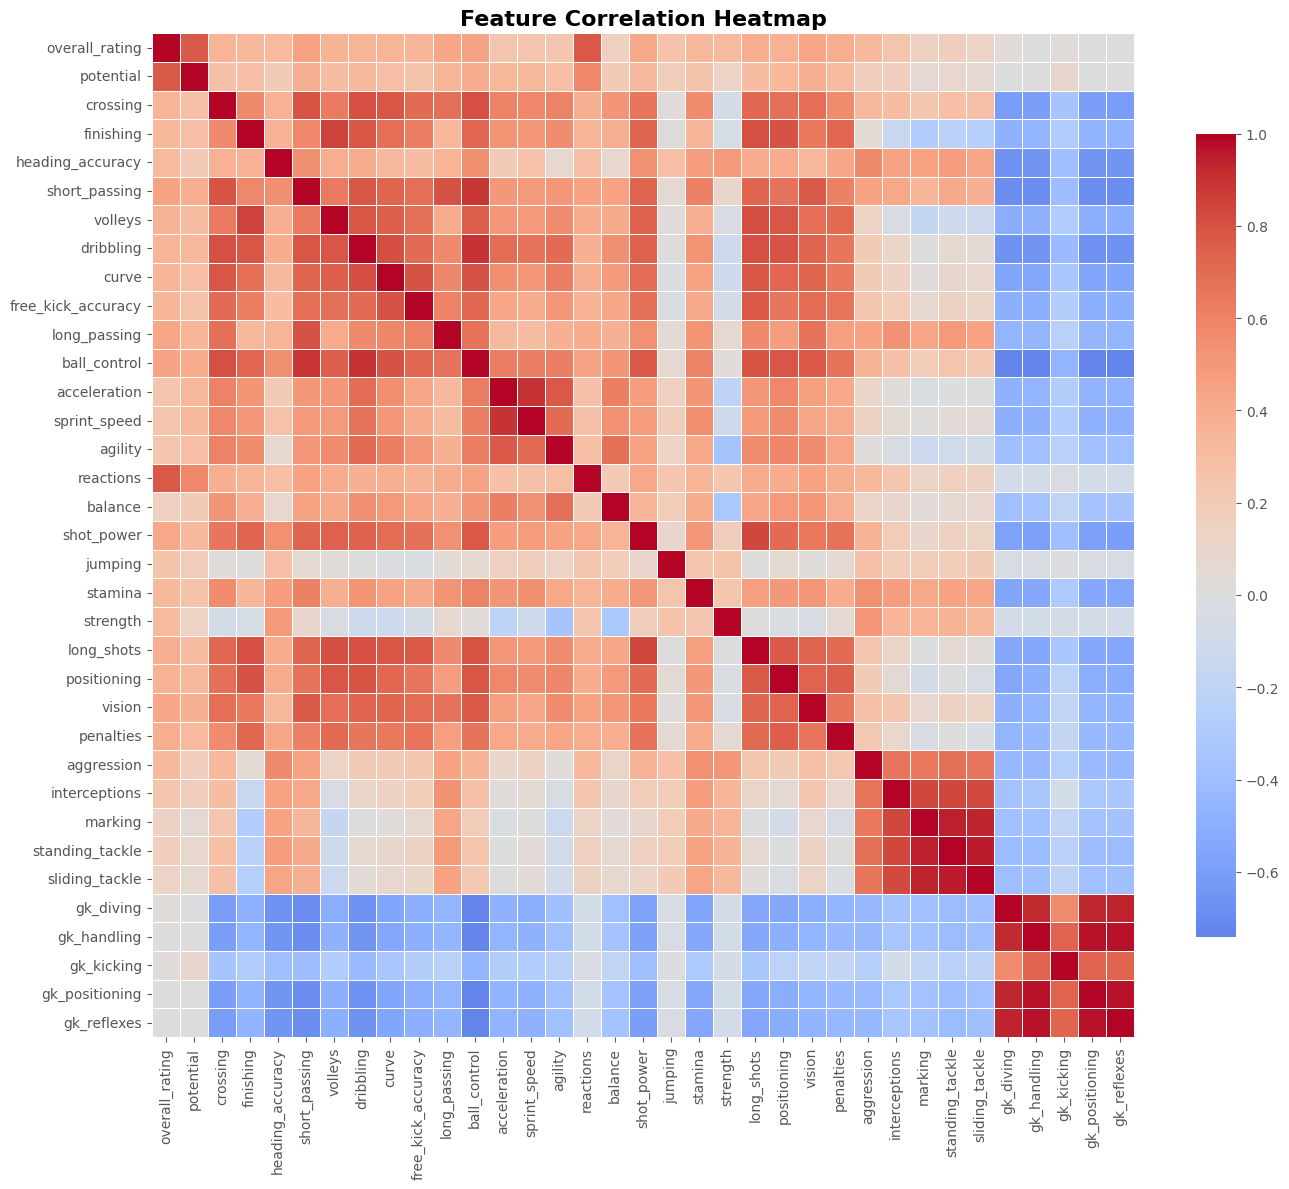


⚠️ Highly Correlated Features (>0.8):
   crossing ↔ dribbling: 0.809
   crossing ↔ ball_control: 0.807
   finishing ↔ volleys: 0.851
   finishing ↔ long_shots: 0.806
   short_passing ↔ ball_control: 0.89
   volleys ↔ long_shots: 0.814
   dribbling ↔ curve: 0.81
   dribbling ↔ ball_control: 0.901
   dribbling ↔ long_shots: 0.806
   acceleration ↔ sprint_speed: 0.904


In [ ]:
# ==============================================================================
# CORRELATION HEATMAP
# ==============================================================================

print("\n🔗 FEATURE CORRELATION ANALYSIS")
print("="*70)

# Select numeric columns only (exclude IDs)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['player_api_id', 'player_fifa_api_id']
skill_cols = [col for col in numeric_cols if col not in exclude_cols]

# Calculate correlation matrix
correlation_matrix = df[skill_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identify highly correlated pairs
print("\n⚠️ Highly Correlated Features (>0.8):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr.append((correlation_matrix.columns[i],
                            correlation_matrix.columns[j],
                            round(correlation_matrix.iloc[i, j], 3)))

if high_corr:
    for pair in high_corr[:10]:  # Show top 10
        print(f"   {pair[0]} ↔ {pair[1]}: {pair[2]}")
else:
    print("   No highly correlated features found")



📦 OUTLIER DETECTION


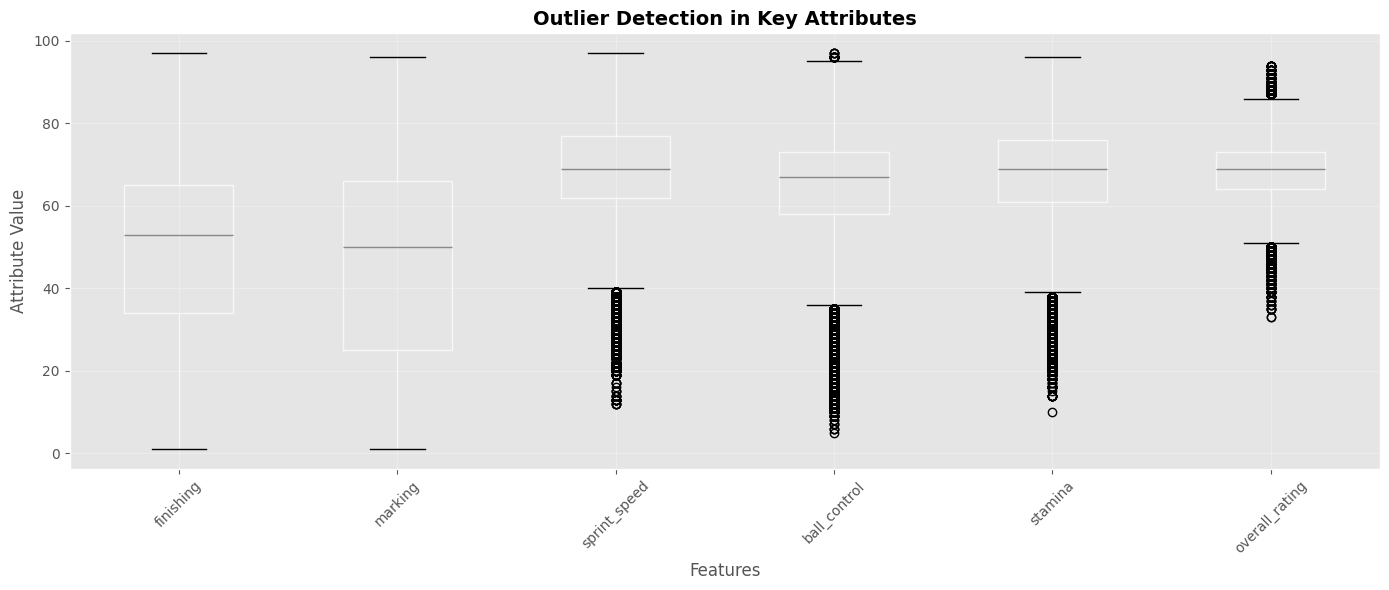

✅ Points beyond whiskers are potential outliers


In [ ]:
# ==============================================================================
# BOXPLOT - OUTLIER DETECTION
# ==============================================================================

print("\n📦 OUTLIER DETECTION")
print("="*70)

# Select key attributes
key_attrs = ['finishing', 'marking', 'sprint_speed', 'ball_control',
             'stamina', 'overall_rating']

plt.figure(figsize=(14, 6))
df[key_attrs].boxplot()
plt.title('Outlier Detection in Key Attributes', fontsize=14, fontweight='bold')
plt.ylabel('Attribute Value', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Points beyond whiskers are potential outliers")


practical 2

In [ ]:
# ==============================================================================
# STEP 2: DATA CLEANING
# ==============================================================================

print("\n" + "="*70)
print("STEP 2: DATA CLEANING")
print("="*70)

# 2.1 CHECK MISSING VALUES
print("\n📊 2.1 CHECKING MISSING VALUES:")
print("-"*70)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Count', ascending=False
)

if len(missing_data) > 0:
    print(f"\n⚠️ Found {missing_data['Missing_Count'].sum():,} missing values across {len(missing_data)} columns:")
    display(missing_data)
else:
    print("✅ No missing values found!")



STEP 2: DATA CLEANING

📊 2.1 CHECKING MISSING VALUES:
----------------------------------------------------------------------

⚠️ Found 15,533 missing values across 8 columns:


,Column,Missing_Count,Missing_Percentage
7,attacking_work_rate,2394,1.31
13,volleys,1877,1.02
15,curve,1877,1.02
21,agility,1877,1.02
23,balance,1877,1.02
25,jumping,1877,1.02
30,vision,1877,1.02
36,sliding_tackle,1877,1.02


In [ ]:
# ==============================================================================
# 2.2 HANDLE MISSING VALUES
# ==============================================================================

print("\n📝 2.2 HANDLING MISSING VALUES:")
print("-"*70)

# Count missing before
missing_before = df.isnull().sum().sum()
print(f"Total missing values BEFORE: {missing_before:,}")

# Strategy 1: Fill NUMERIC columns with MEDIAN
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"✅ {col}: Filled with median = {median_val:.1f}")

# Strategy 2: Fill CATEGORICAL columns with MODE
categorical_cols = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
for col in categorical_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"✅ {col}: Filled with mode = '{mode_val}'")

# Count missing after
missing_after = df.isnull().sum().sum()
print(f"\n✅ Total missing values AFTER: {missing_after}")
print(f"✅ Imputed {missing_before - missing_after:,} missing values")



📝 2.2 HANDLING MISSING VALUES:
----------------------------------------------------------------------
Total missing values BEFORE: 15,533
✅ volleys: Filled with median = 52.0
✅ curve: Filled with median = 56.0
✅ agility: Filled with median = 68.0
✅ balance: Filled with median = 67.0
✅ jumping: Filled with median = 68.0
✅ vision: Filled with median = 60.0
✅ sliding_tackle: Filled with median = 53.0
✅ attacking_work_rate: Filled with mode = 'medium'

✅ Total missing values AFTER: 0
✅ Imputed 15,533 missing values


In [ ]:
# ==============================================================================
# 2.3 REMOVE DUPLICATE RECORDS
# ==============================================================================

print("\n🔄 2.3 REMOVING DUPLICATE RECORDS:")
print("-"*70)

# Check duplicates before
duplicates_before = df.duplicated().sum()
print(f"Duplicate rows BEFORE: {duplicates_before:,}")

# Keep only the LATEST record per player (most recent date)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending=False)
df = df.drop_duplicates(subset='player_api_id', keep='first')

# Check after
duplicates_after = df.duplicated().sum()
print(f"Duplicate rows AFTER: {duplicates_after}")
print(f"\n✅ Removed {duplicates_before - duplicates_after:,} duplicate records")
print(f"✅ Kept most recent snapshot per player")
print(f"📊 New shape: {df.shape[0]:,} rows × {df.shape[1]} columns")



🔄 2.3 REMOVING DUPLICATE RECORDS:
----------------------------------------------------------------------
Duplicate rows BEFORE: 0
Duplicate rows AFTER: 0

✅ Removed 0 duplicate records
✅ Kept most recent snapshot per player
📊 New shape: 11,060 rows × 42 columns


In [ ]:
# ==============================================================================
# 2.4 DROP IRRELEVANT COLUMNS
# ==============================================================================

print("\n🗑️ 2.4 DROPPING IRRELEVANT COLUMNS:")
print("-"*70)

# Save player names for reference
player_names = df[['player_api_id', 'player_name']].copy()

# Define columns to drop
drop_columns = [
    'player_api_id',       # Database ID
    'player_fifa_api_id',  # FIFA ID
    'player_name',         # Text identifier
    'date',                # Timestamp
    'overall_rating',      # Too general
    'potential'            # Future metric
]

print(f"Columns to drop: {drop_columns}")
print(f"\nShape BEFORE: {df.shape}")

# Drop columns
df = df.drop(columns=[col for col in drop_columns if col in df.columns])

print(f"Shape AFTER: {df.shape}")
print(f"✅ Dropped {len(drop_columns)} columns")
print(f"✅ Remaining: {df.shape[1]} columns")



🗑️ 2.4 DROPPING IRRELEVANT COLUMNS:
----------------------------------------------------------------------
Columns to drop: ['player_api_id', 'player_fifa_api_id', 'player_name', 'date', 'overall_rating', 'potential']

Shape BEFORE: (11060, 42)
Shape AFTER: (11060, 36)
✅ Dropped 6 columns
✅ Remaining: 36 columns


In [ ]:
# ==============================================================================
# STEP 3: DATA TRANSFORMATION
# ==============================================================================

print("\n" + "="*70)
print("STEP 3: DATA TRANSFORMATION")
print("="*70)

# 3.1 ENCODE CATEGORICAL VARIABLES
print("\n🔢 3.1 ENCODING CATEGORICAL VARIABLES:")
print("-"*70)

# Encode preferred_foot: Left=0, Right=1
if 'preferred_foot' in df.columns:
    df['preferred_foot_encoded'] = df['preferred_foot'].map({'left': 0, 'right': 1})
    print(f"✅ preferred_foot encoded: left→0, right→1")
    print(f"   Distribution: {df['preferred_foot_encoded'].value_counts().to_dict()}")

# Encode work rates: low=0, medium=1, high=2
work_rate_mapping = {'low': 0, 'medium': 1, 'high': 2}

if 'attacking_work_rate' in df.columns:
    df['attacking_work_rate_encoded'] = df['attacking_work_rate'].map(work_rate_mapping)
    print(f"✅ attacking_work_rate encoded: low→0, medium→1, high→2")
    print(f"   Distribution: {df['attacking_work_rate_encoded'].value_counts().to_dict()}")

if 'defensive_work_rate' in df.columns:
    df['defensive_work_rate_encoded'] = df['defensive_work_rate'].map(work_rate_mapping)
    print(f"✅ defensive_work_rate encoded: low→0, medium→1, high→2")
    print(f"   Distribution: {df['defensive_work_rate_encoded'].value_counts().to_dict()}")

# Drop original categorical columns
df = df.drop(columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'],
             errors='ignore')

print(f"\n✅ Encoding complete! All features are now numeric")
print(f"📊 Current shape: {df.shape}")



STEP 3: DATA TRANSFORMATION

🔢 3.1 ENCODING CATEGORICAL VARIABLES:
----------------------------------------------------------------------
✅ preferred_foot encoded: left→0, right→1
   Distribution: {1: 8373, 0: 2687}
✅ attacking_work_rate encoded: low→0, medium→1, high→2
   Distribution: {1.0: 7507, 2.0: 2375, 0.0: 565}
✅ defensive_work_rate encoded: low→0, medium→1, high→2
   Distribution: {1.0: 7311, 2.0: 1555, 0.0: 1041}

✅ Encoding complete! All features are now numeric
📊 Current shape: (11060, 36)


In [ ]:
# ==============================================================================
# 3.2 VERIFY DATA TYPES
# ==============================================================================

print("\n📋 3.2 VERIFYING DATA TYPES:")
print("-"*70)

# Check data types
print("Data types summary:")
print(df.dtypes.value_counts())

print("\nColumn data types:")
print(df.dtypes)

# Verify all are numeric
numeric_count = df.select_dtypes(include=[np.number]).shape[1]
print(f"\n✅ Total numeric columns: {numeric_count} / {df.shape[1]}")

if numeric_count == df.shape[1]:
    print("✅ All columns are numeric - ready for modeling!")
else:
    print("⚠️ Some non-numeric columns remain - check encoding")



📋 3.2 VERIFYING DATA TYPES:
----------------------------------------------------------------------
Data types summary:
int64      27
float64     9
Name: count, dtype: int64

Column data types:
crossing                         int64
finishing                        int64
heading_accuracy                 int64
short_passing                    int64
volleys                        float64
dribbling                        int64
curve                          float64
free_kick_accuracy               int64
long_passing                     int64
ball_control                     int64
acceleration                     int64
sprint_speed                     int64
agility                        float64
reactions                        int64
balance                        float64
shot_power                       int64
jumping                        float64
stamina                          int64
strength                         int64
long_shots                       int64
positioning               

In [ ]:
# ==============================================================================
# 3.3 SUMMARY STATISTICS AFTER CLEANING
# ==============================================================================

print("\n📊 3.3 SUMMARY STATISTICS (AFTER CLEANING):")
print("-"*70)

print("\nDescriptive statistics:")
display(df.describe().T)

print(f"\n✅ Data Cleaning Summary:")
print(f"   • Final shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Duplicate rows: {df.duplicated().sum()}")
print(f"   • All numeric: {df.select_dtypes(include=[np.number]).shape[1] == df.shape[1]}")



📊 3.3 SUMMARY STATISTICS (AFTER CLEANING):
----------------------------------------------------------------------

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
crossing,11060.0,53.975769,17.471560,6.0,44.0,58.0,67.00,92.0
finishing,11060.0,48.167993,18.963159,3.0,33.0,51.0,64.00,95.0
heading_accuracy,11060.0,56.795027,16.715576,7.0,50.0,60.0,68.00,95.0
short_passing,11060.0,61.783816,13.819657,10.0,57.0,64.0,71.00,93.0
volleys,11060.0,48.000362,17.641388,5.0,34.0,52.0,62.00,92.0
dribbling,11060.0,57.745750,17.756028,6.0,50.0,62.0,70.00,96.0
curve,11060.0,52.065099,17.939019,6.0,41.0,56.0,66.00,94.0
free_kick_accuracy,11060.0,48.192043,17.859278,4.0,35.0,49.0,62.00,94.0
long_passing,11060.0,56.334810,14.365991,10.0,49.0,59.0,66.00,93.0
ball_control,11060.0,62.096112,15.318332,9.0,58.0,65.0,72.00,96.0



✅ Data Cleaning Summary:
   • Final shape: 11,060 rows × 36 columns
   • Missing values: 1766
   • Duplicate rows: 4
   • All numeric: True


checkpoint


STEP 4: FEATURE ENGINEERING - CREATE TARGET VARIABLE

🎯 Creating player_role column...

📊 Player Role Distribution:
player_role
CM    5336
CB    2099
GK     955
DM     795
FB     755
ST     447
AM     370
W      303
Name: count, dtype: int64


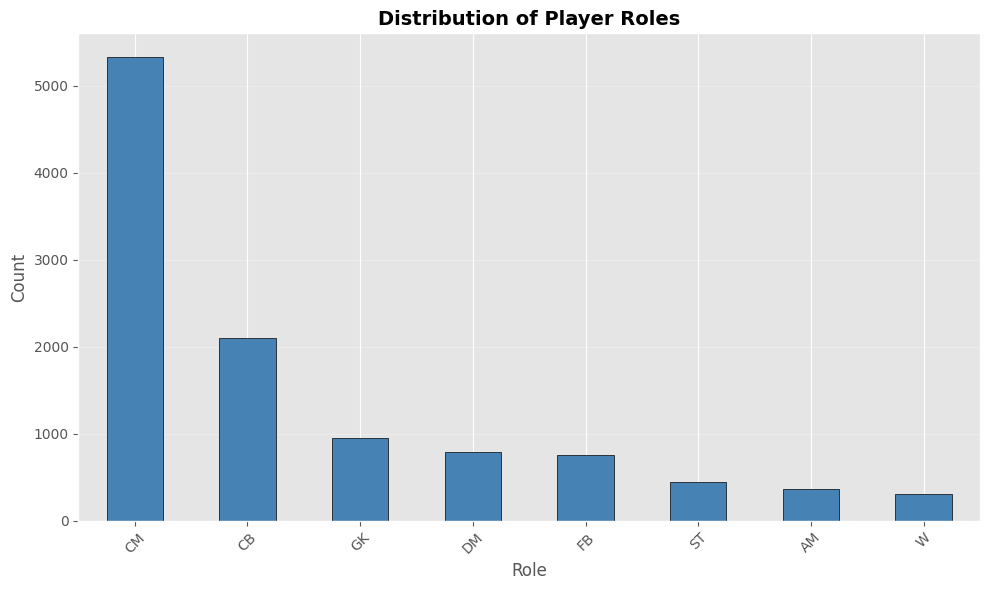


✅ Target variable 'player_role' created!
✅ Total unique roles: 8


In [ ]:
# ==============================================================================
# STEP 4: FEATURE ENGINEERING - CREATE TARGET VARIABLE
# ==============================================================================

print("\n" + "="*70)
print("STEP 4: FEATURE ENGINEERING - CREATE TARGET VARIABLE")
print("="*70)

def assign_player_role(row):
    """
    Assign player role based on FIFA attributes
    """
    # 1. Goalkeeper - high GK stats
    if row['gk_diving'] > 50 and row['gk_reflexes'] > 50:
        return 'GK'

    # 2. Centre-Back - high defending + heading
    elif row['marking'] > 65 and row['standing_tackle'] > 65 and row['heading_accuracy'] > 60:
        return 'CB'

    # 3. Full-Back - defending + pace + crossing
    elif row['marking'] > 55 and row['sprint_speed'] > 70 and row['crossing'] > 60:
        return 'FB'

    # 4. Defensive Midfielder - defending + passing
    elif row['interceptions'] > 60 and row['short_passing'] > 65 and row['marking'] > 55:
        return 'DM'

    # 5. Central Midfielder - balanced passing + stamina
    elif row['short_passing'] > 70 and row['stamina'] > 70:
        return 'CM'

    # 6. Attacking Midfielder - vision + dribbling + shooting
    elif row['vision'] > 70 and row['dribbling'] > 70 and row['long_shots'] > 65:
        return 'AM'

    # 7. Winger - pace + dribbling + crossing
    elif row['sprint_speed'] > 75 and row['dribbling'] > 70 and row['crossing'] > 65:
        return 'W'

    # 8. Striker - finishing + positioning
    elif row['finishing'] > 70 and row['positioning'] > 70:
        return 'ST'

    # Default: Central Midfielder (most common)
    else:
        return 'CM'

# Apply role assignment
print("\n🎯 Creating player_role column...")
df['player_role'] = df.apply(assign_player_role, axis=1)

# Display role distribution
print("\n📊 Player Role Distribution:")
role_counts = df['player_role'].value_counts()
print(role_counts)

# Visualize
plt.figure(figsize=(10, 6))
role_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution of Player Roles', fontsize=14, fontweight='bold')
plt.xlabel('Role', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n✅ Target variable 'player_role' created!")
print(f"✅ Total unique roles: {df['player_role'].nunique()}")


In [ ]:
# mapping
role_mapping = {
    'GK': 0,
    'CB': 1,
    'FB': 2,
    'DM': 3,
    'CM': 4,
    'AM': 5,
    'W' : 6,
    'ST': 7
}

# Encode target variable using map
df['player_role'] = df['player_role'].map(role_mapping)


In [ ]:
print(role_mapping)


{'GK': 0, 'CB': 1, 'FB': 2, 'DM': 3, 'CM': 4, 'AM': 5, 'W': 6, 'ST': 7}


In [ ]:
df.head()

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,positioning,vision,penalties,aggression,interceptions,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_encoded,attacking_work_rate_encoded,defensive_work_rate_encoded,player_role
152778,33,70,56,63,60.0,63,55.0,27,56,66,90,84,73.0,60,64.0,75,67.0,63,59,69,75,45.0,66,83,37,23,17,23.0,13,11,6,9,14,1,1.0,0.0,4
19589,67,67,57,66,69.0,80,67.0,73,58,77,78,90,68.0,73,55.0,85,65.0,78,83,70,67,61.0,66,56,24,19,24,21.0,15,7,8,7,11,1,1.0,0.0,6
1327,49,78,71,63,56.0,74,45.0,43,49,73,82,81,60.0,71,60.0,73,61.0,64,63,70,69,59.0,77,35,20,20,20,21.0,6,14,13,8,6,1,1.0,1.0,4
56972,51,42,75,68,42.0,47,47.0,41,67,62,49,55,52.0,67,47.0,77,55.0,74,92,66,46,32.0,43,77,72,74,75,69.0,11,15,15,12,7,1,1.0,2.0,1
180207,51,66,55,57,60.0,64,50.0,39,48,63,80,80,72.0,60,70.0,64,74.0,67,61,61,56,48.0,59,33,22,15,16,12.0,11,12,12,12,7,1,1.0,1.0,4


In [ ]:
df.to_csv("cleaned_data.csv")

In [ ]:
print("Role Mapping:")
for role, code in role_mapping.items():
    count = role_counts.get(role, 0)
    print(f"{role} (encoded as {code}): {count} players")

Role Mapping:
GK (encoded as 0): 955 players
CB (encoded as 1): 2099 players
FB (encoded as 2): 755 players
DM (encoded as 3): 795 players
CM (encoded as 4): 5336 players
AM (encoded as 5): 370 players
W (encoded as 6): 303 players
ST (encoded as 7): 447 players
